# 베이스라인 코드 해설

## 시드값 고정

In [1]:
import random
import numpy as np
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_number = 42
seed_everything(seed_number)

## 데이터 불러오기 및 확인

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)
data_folder = '/content/gdrive/MyDrive/data/연체탐지/sample_data/'

Mounted at /content/gdrive


In [3]:
import pandas as pd

train = pd.read_csv(data_folder + 'train.csv')
test = pd.read_csv(data_folder + 'test.csv')

display(train.head(3))
display(test.head(3))

,ID,TARGET,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,...,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TRAIN_00000,0,여성,1,1,2,18054000.0,연금수령자,고등학교 졸업,기혼,...,0.004960,1,0,0,Unknown,4.0,기타 1,39,1000,23.0
1,TRAIN_00001,0,남성,1,0,0,59472000.0,근로자,대학교 졸업 이상,기혼,...,0.018029,1,1,0,기술직,2.0,사업 1,45,4,16.0
2,TRAIN_00002,0,여성,0,1,0,29736000.0,근로자,고등학교 졸업,기혼,...,0.010500,1,1,0,단순 노동자,2.0,사업 0,32,3,9.0


,ID,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,TEST_00000,남성,0,0,2,37170000.0,근로자,대학교 중퇴,기혼,주택 / 아파트,0.006296,1,1,0,핵심 노동자,4.0,기타 0,27,2,8.0
1,TEST_00001,남성,0,0,0,47790000.0,근로자,대학교 졸업 이상,기혼,주택 / 아파트,0.004960,1,1,0,관리직,2.0,정부,40,8,11.0
2,TEST_00002,남성,1,1,1,37170000.0,공무원,고등학교 졸업,기혼,주택 / 아파트,0.026392,1,1,0,관리직,3.0,국가 안보,43,15,14.0


In [ ]:
train.columns

Index(['ID', 'TARGET', '성별', '차량 소유 여부', '부동산 소유 여부', '자녀 수', '연간 수입', '수입 유형',
       '최종 학력', '결혼 여부', '주거 형태', '거주지 인구 비율', '휴대전화 소유 여부', '업무용 휴대전화 소유 여부',
       '이메일 소유 여부', '직업', '가족 구성원 수', '산업군', '나이', '근속연수', '가입연수'],
      dtype='object')

In [ ]:
# column 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              60000 non-null  object 
 1   TARGET          60000 non-null  int64  
 2   성별              60000 non-null  object 
 3   차량 소유 여부        60000 non-null  int64  
 4   부동산 소유 여부       60000 non-null  int64  
 5   자녀 수            60000 non-null  int64  
 6   연간 수입           60000 non-null  float64
 7   수입 유형           60000 non-null  object 
 8   최종 학력           60000 non-null  object 
 9   결혼 여부           60000 non-null  object 
 10  주거 형태           60000 non-null  object 
 11  거주지 인구 비율       60000 non-null  float64
 12  휴대전화 소유 여부      60000 non-null  int64  
 13  업무용 휴대전화 소유 여부  60000 non-null  int64  
 14  이메일 소유 여부       60000 non-null  int64  
 15  직업              60000 non-null  object 
 16  가족 구성원 수        60000 non-null  float64
 17  산업군             60000 non-null 

In [ ]:
# null 값 확인
train.isna().sum()

ID                0
TARGET            0
성별                0
차량 소유 여부          0
부동산 소유 여부         0
자녀 수              0
연간 수입             0
수입 유형             0
최종 학력             0
결혼 여부             0
주거 형태             0
거주지 인구 비율         0
휴대전화 소유 여부        0
업무용 휴대전화 소유 여부    0
이메일 소유 여부         0
직업                0
가족 구성원 수          0
산업군               0
나이                0
근속연수              0
가입연수              0
dtype: int64

In [ ]:
# object to string
for key in train.columns:
  if train[key].dtype == 'object':
    train[key] = train[key].astype('string')
for key in test.columns:
  if test[key].dtype == 'object':
    test[key] = test[key].astype('string')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              60000 non-null  string 
 1   TARGET          60000 non-null  int64  
 2   성별              60000 non-null  string 
 3   차량 소유 여부        60000 non-null  int64  
 4   부동산 소유 여부       60000 non-null  int64  
 5   자녀 수            60000 non-null  int64  
 6   연간 수입           60000 non-null  float64
 7   수입 유형           60000 non-null  string 
 8   최종 학력           60000 non-null  string 
 9   결혼 여부           60000 non-null  string 
 10  주거 형태           60000 non-null  string 
 11  거주지 인구 비율       60000 non-null  float64
 12  휴대전화 소유 여부      60000 non-null  int64  
 13  업무용 휴대전화 소유 여부  60000 non-null  int64  
 14  이메일 소유 여부       60000 non-null  int64  
 15  직업              60000 non-null  string 
 16  가족 구성원 수        60000 non-null  float64
 17  산업군             60000 non-null 

## EDA1 - target 비율 확인

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

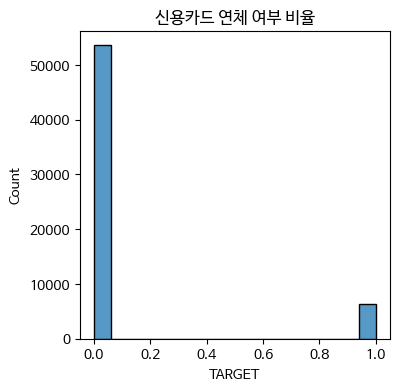

0.10713333333333333


In [ ]:
# 시각화 패키지 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 한글 폰트 설정하기
plt.rc('font', family='NanumBarunGothic')

plt.subplots(figsize = (4,4)) # 그림 크기 설정

sns.histplot(train, x='TARGET')
plt.title('신용카드 연체 여부 비율')
plt.show()

# 약 10%가 연체
print((train['TARGET']==1).sum()/len(train))

In [ ]:
## EDA2 - 상관계수 확인

In [ ]:
target_columns = [col for col in train.columns if train[col].dtype != 'string' ]
train[target_columns].corr()

,TARGET,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,가족 구성원 수,나이,근속연수,가입연수
TARGET,1.000000,-0.017728,-0.000841,0.032403,-0.022029,-0.046628,0.001414,0.055621,-0.001687,0.019743,-0.089787,-0.056893,-0.053070
차량 소유 여부,-0.017728,1.000000,-0.005006,0.103821,0.189901,0.039502,-0.005720,0.153414,0.030853,0.153200,-0.137386,-0.154007,-0.099061
부동산 소유 여부,-0.000841,-0.005006,1.000000,0.002708,0.000104,0.013601,-0.002618,-0.055864,0.029603,0.004770,0.084937,0.056245,0.014240
자녀 수,0.032403,0.103821,0.002708,1.000000,0.023583,-0.031044,0.002324,0.244184,0.024045,0.880867,-0.349601,-0.245182,-0.186734
연간 수입,-0.022029,0.189901,0.000104,0.023583,1.000000,0.164037,0.001668,0.148950,0.086934,0.031991,-0.063664,-0.148595,-0.063627
거주지 인구 비율,-0.046628,0.039502,0.013601,-0.031044,0.164037,1.000000,0.003018,0.004268,0.037071,-0.029475,0.028446,-0.004262,0.052976
휴대전화 소유 여부,0.001414,-0.005720,-0.002618,0.002324,0.001668,0.003018,1.000000,-0.001964,0.000998,0.000700,0.007241,0.002028,0.000114
업무용 휴대전화 소유 여부,0.055621,0.153414,-0.055864,0.244184,0.148950,0.004268,-0.001964,1.000000,0.064660,0.242127,-0.621799,-0.999723,-0.218246
이메일 소유 여부,-0.001687,0.030853,0.029603,0.024045,0.086934,0.037071,0.000998,0.064660,1.000000,0.016820,-0.086785,-0.065064,-0.032881
가족 구성원 수,0.019743,0.153200,0.004770,0.880867,0.031991,-0.029475,0.000700,0.242127,0.016820,1.000000,-0.309557,-0.242777,-0.183647


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


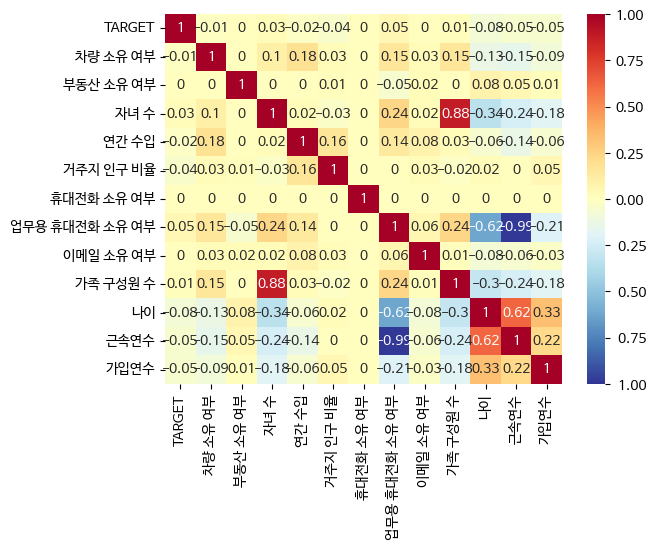

In [ ]:
# 상관계수 시각화
# 깔끔하게 보이기 위해 소수 셋째 자리 버림
corrs = train[target_columns].corr()*100
corrs = corrs.astype(int)/100
sns.heatmap(corrs, cmap = 'RdYlBu_r', vmin = -1, vmax = 1, annot=True)

## EDA 결과
대체적으로 numeric column의 경우  target과 상관계수가 거의 없는 것을 확인할 수 있었다.

## 데이터 전처리 1 - feature와 target 분리

In [ ]:
train_x = train.drop(columns=['ID', 'TARGET'])
train_y = train['TARGET']

test_x = test.drop(columns=['ID'])

## 데이터 전처리 2-1 - 카테고리 변수 확인

In [ ]:
# 성별
display(train['성별'].value_counts())
display(test['성별'].value_counts())


여성    39734
남성    20265
기타        1
Name: 성별, dtype: Int64

여성    26483
남성    13517
Name: 성별, dtype: Int64

성별은 train에만 있는 기타 데이터를 삭제한다

In [ ]:
print(len(train))
train = train[train['성별']!='기타']
print(len(train))

60000
59999


In [ ]:
#수입 유형
display(train['수입 유형'].value_counts())
display(test['수입 유형'].value_counts())

근로자      30693
기타       13878
연금수령자    11274
공무원       4146
실직자          4
학생           2
사업가          2
Name: 수입 유형, dtype: Int64

근로자      20552
기타        9242
연금수령자     7461
공무원       2740
실직자          4
사업가          1
Name: 수입 유형, dtype: Int64

test에 학생 카테고리가 없지만, 그대로 둔다.

In [ ]:
# 최종 학력
display(train['최종 학력'].value_counts())
display(test['최종 학력'].value_counts())


고등학교 졸업      42910
대학교 졸업 이상    14459
대학교 중퇴        1882
저학력자           748
Name: 최종 학력, dtype: Int64

고등학교 졸업      28781
대학교 졸업 이상     9493
대학교 중퇴        1217
저학력자           509
Name: 최종 학력, dtype: Int64

최종 학력의 경우 분포가 비슷하다.  
단, 순위가 있는 항목이므로 적절하게 범주형으로 처리한다.  

In [ ]:
# 결혼 여부
display(train['결혼 여부'].value_counts())
display(test['결혼 여부'].value_counts())

기혼     38795
미혼      8300
사실혼     5827
별거      3770
사별      3307
Name: 결혼 여부, dtype: Int64

기혼     26022
미혼      5471
사실혼     3870
별거      2500
사별      2137
Name: 결혼 여부, dtype: Int64

In [ ]:
#주거 형태
display(train['주거 형태'].value_counts())
display(test['주거 형태'].value_counts())

주택 / 아파트    56041
공공분양         2352
아파트 임대       1080
오피스텔          526
Name: 주거 형태, dtype: Int64

주택 / 아파트    37423
공공분양         1528
아파트 임대        682
오피스텔          367
Name: 주거 형태, dtype: Int64

In [ ]:
# 직업
display(train['직업'].value_counts())
display(test['직업'].value_counts())

Unknown      19034
단순 노동자       10780
영업직           6178
핵심 노동자        5194
관리직           4264
운전자           3572
기술직           2240
회계사           1908
의료 업계 종사자     1671
보안 업계 종사자     1384
조리사           1187
미화원            889
가정부            458
저임금 노동자        379
비서             252
요식업 종사자        248
부동산중개업자        154
인사 담당자         120
IT 업계 종사자       87
Name: 직업, dtype: Int64

Unknown      12801
단순 노동자        7060
영업직           4061
핵심 노동자        3477
관리직           2795
운전자           2493
기술직           1449
회계사           1307
의료 업계 종사자     1099
보안 업계 종사자      874
조리사            770
미화원            618
가정부            347
저임금 노동자        276
요식업 종사자        186
비서             157
부동산중개업자         95
IT 업계 종사자       71
인사 담당자          64
Name: 직업, dtype: Int64

직업의 종류는 비슷하나, 분포가 달라졌다

In [ ]:
# 산업군
display(train['산업군'].value_counts())
display(test['산업군'].value_counts())

사업 2       13130
기타 1       11275
자영업         7549
기타 0        3192
의학          2180
사업 0        2059
정부          2021
학교          1731
무역 0        1522
건설          1376
유치원         1339
사업 1        1154
운송 1        1047
산업 4         741
보안           674
무역 3         652
산업 8         621
주택           575
산업 3         519
군대           508
농업           494
은행           466
운송 2         441
경찰           435
우체부          424
국가 안보        383
레스토랑         344
무역 2         316
서비스          291
대학교          269
산업 7         232
운송 0         225
산업 9         203
호텔           187
산업 10        183
전기           173
보험           122
무역 6         106
통신           101
산업 2          83
부동산 중개업       80
문화            79
산업 0          77
광고            72
모바일           60
법률 서비스        56
무역 1          53
환경            48
운송 3          42
산업 1          20
산업 6          18
종교            16
산업 5          15
무역 5          12
무역 4           5
산업 12          3
Name: 산업군, dtype: Int64

사업 2       8821
기타 1       7464
자영업        4990
기타 0       2219
의학         1409
사업 0       1389
정부         1362
학교         1122
무역 0       1012
유치원         901
건설          856
사업 1        747
운송 1        700
산업 4        532
산업 8        429
무역 3        423
보안          399
주택          387
산업 3        357
농업          347
군대          320
은행          307
경찰          293
우체부         291
운송 2        285
국가 안보       245
레스토랑        229
무역 2        220
서비스         213
산업 7        172
운송 0        165
대학교         165
산업 9        144
산업 10       124
호텔          111
전기          103
무역 6         82
보험           77
통신           71
산업 2         62
광고           60
부동산 중개업      54
문화           49
무역 1         49
산업 0         48
법률 서비스       39
모바일          35
환경           33
운송 3         25
산업 6         16
산업 1         12
종교           12
무역 5          9
산업 5          6
산업 12         5
무역 4          3
Name: 산업군, dtype: Int64

In [ ]:
# 산업군 통합
train['산업군'] = train['산업군'].str.replace('[0-9]','')
test['산업군'] = test['산업군'].str.replace('[0-9]','')
display(train['산업군'].value_counts())
display(test['산업군'].value_counts())

<ipython-input-39-24a2d6a90c4a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train['산업군'] = train['산업군'].str.replace('[0-9]','')
<ipython-input-39-24a2d6a90c4a>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  test['산업군'] = test['산업군'].str.replace('[0-9]','')


사업         16343
기타         14467
자영업         7549
산업          2715
무역          2666
의학          2180
정부          2021
운송          1755
학교          1731
건설          1376
유치원         1339
보안           674
주택           575
군대           508
농업           494
은행           466
경찰           435
우체부          424
국가 안보        383
레스토랑         344
서비스          291
대학교          269
호텔           187
전기           173
보험           122
통신           101
부동산 중개업       80
문화            79
광고            72
모바일           60
법률 서비스        56
환경            48
종교            16
Name: 산업군, dtype: Int64

사업         10957
기타          9683
자영업         4990
산업          1907
무역          1798
의학          1409
정부          1362
운송          1175
학교          1122
유치원          901
건설           856
보안           399
주택           387
농업           347
군대           320
은행           307
경찰           293
우체부          291
국가 안보        245
레스토랑         229
서비스          213
대학교          165
호텔           111
전기           103
보험            77
통신            71
광고            60
부동산 중개업       54
문화            49
법률 서비스        39
모바일           35
환경            33
종교            12
Name: 산업군, dtype: Int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['성별', '수입 유형', '결혼 여부', '주거 형태', '직업', '산업군']
rank_feature = '최종 학력'
for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_x[i])
    train_x[i]=le.transform(train_x[i])

    for case in np.unique(test_x[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    test_x[i]=le.transform(test_x[i])
rank_dict = {
    '대학교 졸업 이상' : 3,
    '대학교 중퇴' : 2,
    '고등학교 졸업':1,
    '저학력자':0}
train_x[rank_feature] = train_x[rank_feature].map(lambda x:rank_dict[x])
test_x[rank_feature] = test_x[rank_feature].map(lambda x:rank_dict[x])

display(train_x.head(3))
display(test_x.head(3))

,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,2,1,1,2,18054000.0,5,1,0,3,0.004960,1,0,0,1,4.0,6,39,1000,23.0
1,1,1,0,0,59472000.0,1,3,0,3,0.018029,1,1,0,4,2.0,24,45,4,16.0
2,2,0,1,0,29736000.0,1,1,0,3,0.010500,1,1,0,5,2.0,23,32,3,9.0


,성별,차량 소유 여부,부동산 소유 여부,자녀 수,연간 수입,수입 유형,최종 학력,결혼 여부,주거 형태,거주지 인구 비율,휴대전화 소유 여부,업무용 휴대전화 소유 여부,이메일 소유 여부,직업,가족 구성원 수,산업군,나이,근속연수,가입연수
0,1,0,0,2,37170000.0,1,2,0,3,0.006296,1,1,0,17,4.0,5,27,2,8.0
1,1,0,0,0,47790000.0,1,3,0,3,0.004960,1,1,0,3,2.0,49,40,8,11.0
2,1,1,1,1,37170000.0,0,1,0,3,0.026392,1,1,0,3,3.0,3,43,15,14.0


## 오버샘플링 1 : RandomOverSampler
RandomOverSampler를 통한 target 비율 동일하게 샘플링

In [ ]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=seed_number)
train_x_oversampled, train_y_oversampled = oversampler.fit_resample(train_x, train_y)

## 오버샘플링 2 : 결과 확인

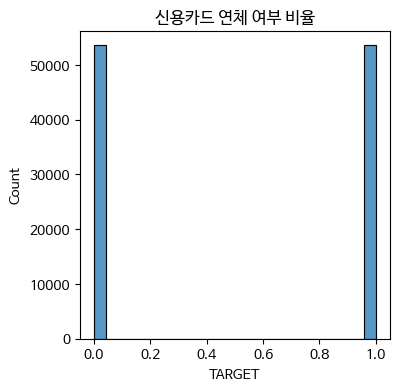

In [ ]:
plt.subplots(figsize = (4,4))

sns.histplot(train_y_oversampled)
plt.title('신용카드 연체 여부 비율')
plt.show()

## 모델 학습 1
RandomForestClassifier full attr

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=seed_number, n_estimators=100,oob_score = True)
model.fit(train_x_oversampled, train_y_oversampled)
print("훈련 세트 정확도: {:.3f}".format(model.score(train_x_oversampled ,train_y_oversampled)))
print("OOB 샘플의 정확도: {:.3f}".format(model.oob_score_) )

훈련 세트 정확도: 1.000
OOB 샘플의 정확도: 0.996


In [ ]:
model = RandomForestClassifier(random_state=seed_number, n_estimators=100,oob_score = True)
model.fit(train_x, train_y)
print("훈련 세트 정확도: {:.3f}".format(model.score(train_x ,train_y)))
print("OOB 샘플의 정확도: {:.3f}".format(model.oob_score_) )

훈련 세트 정확도: 1.000
OOB 샘플의 정확도: 0.892


In [ ]:
pred_probability = model.predict(test_x)

display(model.classes_)
display(np.unique(pred_probability,return_counts=True))

array([0, 1])

(array([0, 1]), array([39762,   238]))

In [ ]:
pred_probability2 = model.predict_proba(test_x)[:,1]

display(model.classes_)
display(pred_probability2)
pred_probability2[pred_probability2<0.2] = 0
pred_probability2[pred_probability2>0.8] = 1
display(pred_probability2)

array([0, 1])

array([0.26, 0.07, 0.04, ..., 0.11, 0.01, 0.16])

array([0.26, 0.  , 0.  , ..., 0.  , 0.  , 0.  ])

## 제출양식에 예측결과 입력

In [ ]:
sample_submission = pd.read_csv(data_folder + 'sample_submission.csv')

baseline_submission = sample_submission.copy()
baseline_submission['TARGET'] = pred_probability2
baseline_submission
baseline_submission.to_csv(data_folder + 'rank_category_encode_clip.csv', index=False)

,ID,TARGET
0,TEST_00000,0.26
1,TEST_00001,0.00
2,TEST_00002,0.00
3,TEST_00003,0.00
4,TEST_00004,0.30
...,...,...
39995,TEST_39995,0.00
39996,TEST_39996,0.00
39997,TEST_39997,0.00
39998,TEST_39998,0.00


## 모델 학습 2
RandomForestClassifier drop attr

In [ ]:
categorical_features = ['성별', '수입 유형', '결혼 여부', '주거 형태', '직업', '산업군', '최종 학력','TARGET']
train_cor = train[categorical_features]
rank_feature = '최종 학력'
for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_cor[i])
    train_cor[i]=le.transform(train_cor[i])

rank_dict = {
    '대학교 졸업 이상' : 3,
    '대학교 중퇴' : 2,
    '고등학교 졸업':1,
    '저학력자':0}
train_cor.corr()

<ipython-input-114-b69ee8857e9a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cor[i]=le.transform(train_cor[i])
<ipython-input-114-b69ee8857e9a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cor[i]=le.transform(train_cor[i])
<ipython-input-114-b69ee8857e9a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,성별,수입 유형,결혼 여부,주거 형태,직업,산업군,최종 학력,TARGET
성별,1.000000,0.137769,0.112772,-0.002619,0.038602,0.007361,0.014025,-0.067330
수입 유형,0.137769,1.000000,0.072864,0.019809,-0.470488,-0.559725,-0.108004,-0.053901
결혼 여부,0.112772,0.072864,1.000000,-0.021898,-0.035217,-0.034167,-0.049371,0.017048
주거 형태,-0.002619,0.019809,-0.021898,1.000000,-0.014499,-0.004220,0.043936,-0.014381
직업,0.038602,-0.470488,-0.035217,-0.014499,1.000000,0.359147,0.107294,0.019887
산업군,0.007361,-0.559725,-0.034167,-0.004220,0.359147,1.000000,0.056741,0.028897
최종 학력,0.014025,-0.108004,-0.049371,0.043936,0.107294,0.056741,1.000000,-0.064952
TARGET,-0.067330,-0.053901,0.017048,-0.014381,0.019887,0.028897,-0.064952,1.000000


In [ ]:
train_x_oversampled3 = train_x_oversampled.drop(columns= ['부동산 소유 여부','가족 구성원 수','산업군','주거 형태'])
train_y_oversampled3 = train_y_oversampled.drop(columns= ['부동산 소유 여부','가족 구성원 수','산업군','주거 형태'])

In [ ]:
model = RandomForestClassifier(random_state=seed_number, n_estimators=100,oob_score = True, criterion = 'entropy')
model.fit(train_x_oversampled3, train_y_oversampled3)
print("훈련 세트 정확도: {:.3f}".format(model.score(train_x_oversampled3 ,train_y_oversampled3)))
print("OOB 샘플의 정확도: {:.3f}".format(model.oob_score_) )

훈련 세트 정확도: 1.000
OOB 샘플의 정확도: 0.996


In [ ]:
pred_probability = model.predict_proba(test_x)[:,1]

display(model.classes_)
display(pred_probability)
display(pred_probability)

array([0, 1])

array([0.24, 0.12, 0.08, ..., 0.13, 0.04, 0.07])

array([0.24, 0.12, 0.08, ..., 0.13, 0.04, 0.07])

In [ ]:
sample_submission = pd.read_csv(data_folder + 'sample_submission.csv')

baseline_submission = sample_submission.copy()
baseline_submission['TARGET'] = pred_probability
baseline_submission
baseline_submission.to_csv(data_folder + 'rank_category_encode_entropy.csv', index=False)

## 모델 학습 3
catboost 사용

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool
train = pd.read_csv(data_folder + 'train.csv')
test = pd.read_csv(data_folder + 'test.csv')
train = train[train['성별']!='기타']


train_x = train.drop(columns=['ID', 'TARGET'])
train_y = train['TARGET']
test_x = test.drop(columns=['ID'])

categorical_features = ['성별', '수입 유형', '최종 학력', '결혼 여부', '주거 형태', '직업', '산업군']
for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_x[i])
    train_x[i]=le.transform(train_x[i])

    for case in np.unique(test_x[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    test_x[i]=le.transform(test_x[i])

from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=seed_number)
train_x_oversampled, train_y_oversampled = oversampler.fit_resample(train_x, train_y)

NameError: name 'LabelEncoder' is not defined

In [ ]:
model = CatBoostClassifier(iterations=30,
                           depth=10,
                           learning_rate=1,
                           loss_function='Logloss')
train_pool = Pool(train_x_oversampled,
                  train_y_oversampled,
                  cat_features=[0,2,5])
test_pool = Pool(test_x,
                  cat_features=[0,2,5])
model.fit(train_pool)
print("훈련 세트 정확도: {:.3f}".format(model.score(train_x_oversampled ,train_y_oversampled)))

In [ ]:
pred_probability = model.predict_proba(test_x)

display(model.classes_)
display(pred_probability)

array([0, 1])

array([[0.42144091, 0.57855909],
       [0.85032625, 0.14967375],
       [0.9700462 , 0.0299538 ],
       ...,
       [0.71548495, 0.28451505],
       [0.74828823, 0.25171177],
       [0.569186  , 0.430814  ]])

In [ ]:
sample_submission = pd.read_csv(data_folder + 'sample_submission.csv')

baseline_submission = sample_submission.copy()
baseline_submission['TARGET'] = pred_probability[:,1]

baseline_submission.to_csv(data_folder + 'catboost.csv', index=False)

## 모델 학습 4
catboost - 직업군 전처리

In [ ]:
train = pd.read_csv(data_folder + 'train.csv')
test = pd.read_csv(data_folder + 'test.csv')
train = train[train['성별']!='기타']

train['산업군'] = train['산업군'].str.replace('[0-9]','')
test['산업군'] = test['산업군'].str.replace('[0-9]','')

<ipython-input-98-16f211381010>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  train['산업군'] = train['산업군'].str.replace('[0-9]','')
<ipython-input-98-16f211381010>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  test['산업군'] = test['산업군'].str.replace('[0-9]','')


In [ ]:
categorical_features = ['성별', '수입 유형', '최종 학력', '결혼 여부', '주거 형태', '직업', '산업군']
for i in categorical_features:
    le = LabelEncoder()
    le=le.fit(train_x[i])
    train_x[i]=le.transform(train_x[i])

    for case in np.unique(test_x[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    test_x[i]=le.transform(test_x[i])

from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=seed_number)
train_x_oversampled, train_y_oversampled = oversampler.fit_resample(train_x, train_y)

In [ ]:
model = CatBoostClassifier(iterations=30,
                           depth=10,
                           learning_rate=1,
                           loss_function='Logloss')
train_pool = Pool(train_x_oversampled,
                  train_y_oversampled,
                  cat_features=[0,2,5])
test_pool = Pool(test_x,
                  cat_features=[0,2,5])
model.fit(train_pool)
print("훈련 세트 정확도: {:.3f}".format(model.score(train_x_oversampled ,train_y_oversampled)))

0:	learn: 0.6474961	total: 67ms	remaining: 1.94s
1:	learn: 0.6359853	total: 134ms	remaining: 1.88s
2:	learn: 0.6247524	total: 199ms	remaining: 1.79s
3:	learn: 0.6200397	total: 261ms	remaining: 1.7s
4:	learn: 0.6139624	total: 336ms	remaining: 1.68s
5:	learn: 0.6048340	total: 403ms	remaining: 1.61s
6:	learn: 0.5989783	total: 469ms	remaining: 1.54s
7:	learn: 0.5837700	total: 561ms	remaining: 1.54s
8:	learn: 0.5797694	total: 629ms	remaining: 1.47s
9:	learn: 0.5760675	total: 691ms	remaining: 1.38s
10:	learn: 0.5697218	total: 754ms	remaining: 1.3s
11:	learn: 0.5606438	total: 824ms	remaining: 1.24s
12:	learn: 0.5547824	total: 891ms	remaining: 1.17s
13:	learn: 0.5504757	total: 953ms	remaining: 1.09s
14:	learn: 0.5434106	total: 1.02s	remaining: 1.02s
15:	learn: 0.5335470	total: 1.09s	remaining: 952ms
16:	learn: 0.5234549	total: 1.15s	remaining: 881ms
17:	learn: 0.5174893	total: 1.22s	remaining: 812ms
18:	learn: 0.5098423	total: 1.28s	remaining: 744ms
19:	learn: 0.5048747	total: 1.35s	remaining:

In [ ]:
pred_probability = model.predict_proba(test_x)

display(model.classes_)
display(pred_probability)

array([0, 1])

array([[0.42144091, 0.57855909],
       [0.85032625, 0.14967375],
       [0.9700462 , 0.0299538 ],
       ...,
       [0.71548495, 0.28451505],
       [0.74828823, 0.25171177],
       [0.569186  , 0.430814  ]])

In [ ]:
sample_submission = pd.read_csv(data_folder + 'sample_submission.csv')

baseline_submission = sample_submission.copy()
baseline_submission['TARGET'] = pred_probability[:,1]

baseline_submission.to_csv(data_folder + 'catboost2.csv', index=False)